## Nutzung: <br>
Dieses Notebook ist gedacht als anwendungsbeispiel, wie man für den Versuch 2 daten aus einer .csv datei einließt und in Grafiken oder Latex tabellen umwandelt.
data.csv sind hier besipiel Daten, aus dem entsprechendem Versuch <br>

Es sollte einfach sein dieses Notebook so zu bearbeiten, dass es mit den eigenen gemessenen Daten funktioniert. <br>

Lade dafür einfach die entsprechende .csv Datei hoch, in den selben Ordner, in dem du gerade dieses Notebook ließt.<br>
Am besten formatiere direkt die Spalten so, dass sie einen Namen haben und geordnet sind. ähnlich wie es in data.csv ist <br>

Dann:
Ersetze in der Zelle pd.read_csv das data.csv durch den Datei namen der hochgeladenen .csv Datei. Wenn du in der datei das dezimal-Trennzeichen als . hast entferne "decimal="," <br>
Danach kann man durch db[ "Spaltenname" ] auf die entsprechenden Spalten zugreifen, wie unten gezeigt. So können auch neue Spalten für bearbeitete Daten hinzugefügt werden <br>

Zum erstellen einer Grafik passe einfach die namen an, der eingefügten Spalten auf die Daten die du in der Grafik haben willst <br>

Zum erstellen einer Tabelle rufe die Methode printLatexDataFrame(dfToPrint) auf. Wie sie benutzt werden soll kann bei der Methode gefunden werden <br>



Anmerkungen:
Damit die benutzen Methoden funktioniert braucht es eine Python umgebung mit den Modulen "numpy", "pandas", "matplotlib", wie z.B Jupyter cloud der gdwg es bereit stellt. <br>
Lerne mehr unter: https://jupyter-cloud.gwdg.de/ <br>
Informationen und die Dokumentation der Verwendeten Module gibt es auf diesen Websites <br>
Pandas: https://pandas.pydata.org/ <br>
Numpy: https://numpy.org/ <br>
Matplotlib: https://matplotlib.org/

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
db = pd.read_csv("data.csv", decimal=",")
db.head()

,n,beta,fehler beta
0,-4,-0.23988,0.05536
1,-3,-0.18372,0.03300
2,-2,-0.12258,0.01488
3,-1,-0.06534,0.00426
4,0,0.00000,0.00000


In [4]:
lmbda = 5.32 * 10**-7
db["n*lambda"] = db["n"] * lmbda
db["sinbeta"] = np.sin(db["beta"])
db["deltasinbeta"] = np.abs(np.cos(db["beta"]) * db["fehler beta"])
db.head()

,n,beta,fehler beta,n*lambda,sinbeta,deltasinbeta
0,-4,-0.23988,0.05536,-2.128000e-06,-0.237586,0.053775
1,-3,-0.18372,0.03300,-1.596000e-06,-0.182688,0.032445
2,-2,-0.12258,0.01488,-1.064000e-06,-0.122273,0.014768
3,-1,-0.06534,0.00426,-5.320000e-07,-0.065294,0.004251
4,0,0.00000,0.00000,0.000000e+00,0.000000,0.000000


In [5]:
xData = db["sinbeta"]
yData = db["n*lambda"]
xErr = db["deltasinbeta"]
m,b = np.polyfit(xData, yData, 1)

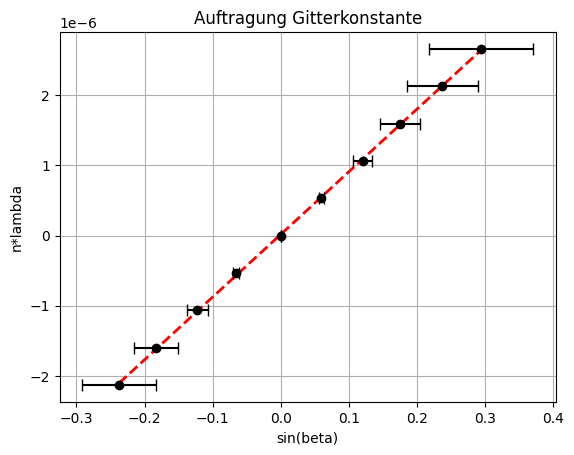

In [9]:
plt.plot(xData, m*xData+b, color ="red", linestyle="--", label=f"Fit: y = {m:.4f}x + {b:.4f}", linewidth=2)
plt.errorbar(xData, yData, xerr=xErr, fmt="o", markersize=6, capsize=4, color="black", ecolor="black")
plt.xlabel("sin(beta)")
plt.ylabel("n*lambda")
plt.title("Auftragung Gitterkonstante")
plt.grid(True)
plt.show()

In [7]:
"""""
Die Methode ist gedacht um Pandas Dataframes in Latex Tabellen zu konvertieren
Einfach die zu umwandelnden Daten rein geben als Parameter und die Ausgabe in die Latex Tabelle kopieren
Sollte es bei den Werten sich um Strings handeln entferne einfach die $$ zeichen in der for Schleife
Parameter: dfToPrint Pandas Data Frame, der ausgegeben werden soll
Return Value: Zeichenkette, die ausgegeben werden kann, die dann direkt in eine Latex Tabelle kopiert werden kann
"""
def printLatexDataFrame(toPrintDf : pd.DataFrame) -> str:
    lines = []
    for index, row in toPrintDf.iterrows():
        formatted_row = " & ".join(f"${val}$" for val in row)
        lines.append(formatted_row + r" \\")
    return "\n".join(lines)

In [8]:
print(printLatexDataFrame(db))

$-4.0$ & $-0.23988$ & $0.05536$ & $-2.128e-06$ & $-0.23758606415897318$ & $0.053774849006724905$ \\
$-3.0$ & $-0.18372$ & $0.033$ & $-1.596e-06$ & $-0.1826882247818159$ & $0.03244463959795037$ \\
$-2.0$ & $-0.12258$ & $0.01488$ & $-1.064e-06$ & $-0.12227325230180748$ & $0.014768347539635034$ \\
$-1.0$ & $-0.06534$ & $0.00426$ & $-5.32e-07$ & $-0.06529351707673904$ & $0.004250909592614003$ \\
$0.0$ & $0.0$ & $0.0$ & $0.0$ & $0.0$ & $0.0$ \\
$1.0$ & $0.05931$ & $0.00351$ & $5.32e-07$ & $0.05927523388711111$ & $0.0035038282879364174$ \\
$2.0$ & $0.1206$ & $0.0144$ & $1.064e-06$ & $0.1203078708864939$ & $0.01429540746952685$ \\
$3.0$ & $0.1759$ & $0.03031$ & $1.596e-06$ & $0.17499432084517516$ & $0.029842299810905252$ \\
$4.0$ & $0.23955$ & $0.05327$ & $2.128e-06$ & $0.23726550028581286$ & $0.051748866769688436$ \\
$5.0$ & $0.29893$ & $0.07971$ & $2.6600000000000004e-06$ & $0.2944978276425037$ & $0.07617503278117282$ \\
